In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PyCrystalField as cef

 *******************************************************
 *                PyCrystalField 2.3.9                 *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



In [2]:
########### Define Stevens Operators 
Bparams = {'B20': 0.1271, 'B22':-0.4371, 'B40':6.6574e-4,'B42': -0.0017, 'B44': 0.0033, 
           'B60':1.0300e-5, 'B62':9.0100e-5, 'B64':5.0300e-5, 'B66':-8.5100e-6}

Pr = cef.CFLevels.Bdict('Er3+',Bparams)

In [3]:
########### print eigenvectors
Pr.printEigenvectors()
print(Pr.eigenvalues * 8.066)


 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.     0.007  0.     0.049  0.     0.032  0.    -0.071  0.     0.14
  0.     0.608  0.     0.758  0.    -0.164]  |
0.00000 	|  [ 0.164  0.    -0.758  0.    -0.608  0.    -0.14   0.     0.071  0.
 -0.032  0.    -0.049  0.    -0.007  0.   ]  |
5.76649 	|  [-0.009  0.     0.044  0.     0.024  0.     0.002  0.    -0.097  0.
 -0.713  0.    -0.691  0.     0.044  0.   ]  |
5.76649 	|  [ 0.    -0.044  0.     0.691  0.     0.713  0.     0.097  0.    -0.002
  0.    -0.024  0.    -0.044  0.     0.009]  |
9.75506 	|  [ 0.     0.808  0.     0.315  0.    -0.202  0.    -0.434  0.     0.098
  0.     0.025  0.    -0.096  0.     0.01 ]  |
9.75506 	|  [-0.01   0.     0.096  0.    -0.025  0.    -0.098  0.     0.434  0.
  0.202  0.    -0.315  0.    -0.808  0.   ]  |
12.85675 	|  [-0.016  0.     0.384  0.    -0.29   0.    -0.865  0.    -0.027  0

Text(17, 1.9, 'Er$_2$Ti$_2$O$_7$ simulation')

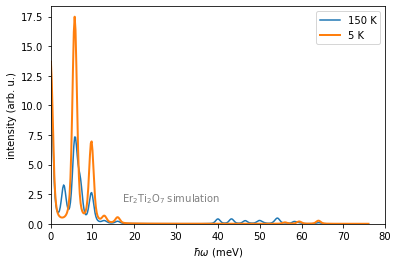

In [4]:
########### plot neutron spectrum

hw = np.linspace(-5,76,400)
intens1 = Pr.normalizedNeutronSpectrum(hw, Temp=5, ResFunc= lambda x: 1, gamma = 0.5)
intens2 = Pr.normalizedNeutronSpectrum(hw, Temp=150, ResFunc= lambda x: 1, gamma = 0.5)

plt.figure()
plt.plot(hw, intens2, label='150 K')
plt.plot(hw, intens1, lw=2, label='5 K')

plt.ylim(0,)
plt.xlim(0,)
plt.xlabel('$\\hbar \\omega$ (meV)')
plt.ylabel('intensity (arb. u.)')
plt.legend()
plt.text(17,1.9,'Er$_2$Ti$_2$O$_7$ simulation', color='grey')

In [24]:
print(Pr.O[5])

[[  900900.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.]
 [       0. -1621620.        0.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.]
 [       0.        0.  -540540.        0.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.]
 [       0.        0.        0.   817740.        0.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.]
 [       0.        0.        0.        0.  1205820.        0.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.]
 [       0.        0.        0.        0.        0.   623700.        0.
         0.        0.        0.        0.        0.        0.        0.
         0.        0.

In [12]:
ion = 'Er3+'

def zeemansplitting(obj, Field):
    '''Calculate eigenvalues of CEF spectrum in field'''

     # A) Define magnetic Hamiltonian
    muB = 5.7883818012e-2  # meV/T
    #mu0 = np.pi*4e-7       # T*m/A
    JdotB = muB*(Field[0]*cef.Operator.Jx(obj.J) + Field[1]*cef.Operator.Jy(obj.J) +\
                 Field[2]*cef.Operator.Jz(obj.J))*cef.LandeGFactor(ion)

    # B) Diagonalize full Hamiltonian
    oldH = np.sum([a*b for a,b in zip(obj.O, obj.B)], axis=0)
    obj.diagonalize(oldH + JdotB.O)
    return obj.eigenvalues


Bfield = np.linspace(0,20,300)
# Calculate eigenvalues for each field
CalcEvs_a, CalcEvs_b, CalcEvs_c = [], [], []
for B in Bfield:
    CalcEvs_a.append(zeemansplitting(Pr, [B,0,0]))
    CalcEvs_b.append(zeemansplitting(Pr, [0,B,0]))
    CalcEvs_c.append(zeemansplitting(Pr, [0,0,B]))
CalcEvs_a = np.array(CalcEvs_a)
CalcEvs_b = np.array(CalcEvs_b)
CalcEvs_c = np.array(CalcEvs_c)

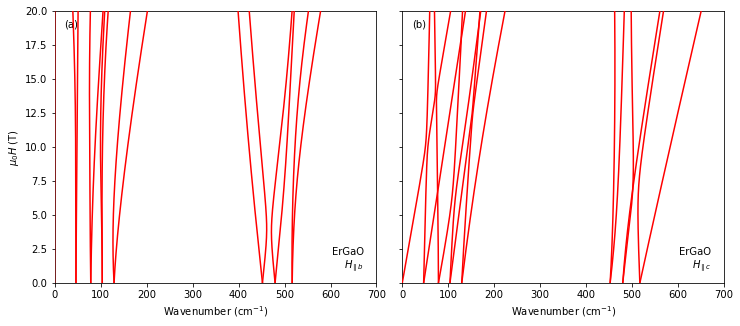

In [29]:
f, ax = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)
mevtocm = 8.066
norm = plt.Normalize(0, 6)

for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax[0].plot(cev*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]
        ax[1].plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10)#pf.cpal1[0]

ax[0].set_ylabel('$\\mu_0 H$ (T)')
abc = 'abc'
for i in range(len(ax)):
    ax[i].set_xlim(0,700)
    ax[i].set_ylim(0,20)
    ax[i].set_xlabel('Wavenumber (cm$^{-1}$)')
    ax[i].text(0.96,0.03, 'ErGaO\n$H_{\\parallel '+abc[i+1]+'}$', 
                ha='right', va='bottom', transform=ax[i].transAxes)
    plt_label = ['(a)','(b)','(c)']
    ax[i].text(0.03,0.97, plt_label[i], transform=ax[i].transAxes, va='top')#pf.parSubPlotLabel(i)
# ax[0].set_title('Calculated CsErSe$_2$ CEF eigenvalues', fontsize=15)

f.subplots_adjust(wspace=0.08)

Text(0, 0.5, '$\\mu_0 H_{\\parallel c}$ (T)')

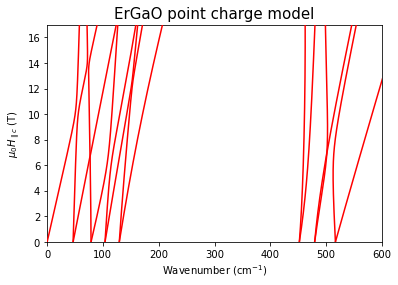

In [8]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(CalcEvs_c.T[i]*mevtocm, Bfield, color='r',zorder=10) #pf.cpal1[0]

ax.set_xlim(0,600)
ax.set_ylim(0,17)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_title('ErGaO point charge model', fontsize=15)
ax.set_ylabel('$\\mu_0 H_{\\parallel c}$ (T)')

#plt.savefig('CsPrSe2_C-axis-splitting.pdf')

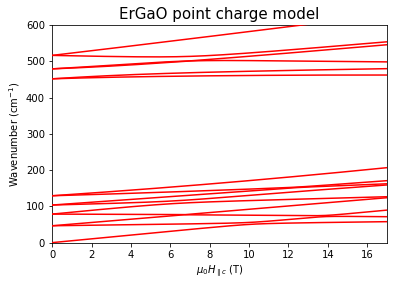

In [57]:
f, ax = plt.subplots()
for i, cev in enumerate(CalcEvs_b.T):
    if i > 0:
        ax.plot(Bfield, CalcEvs_c.T[i]*mevtocm, color='r',zorder=10) #pf.cpal1[0]

ax.set_ylim(0,600)
ax.set_xlim(0,17)
ax.set_ylabel('Wavenumber (cm$^{-1}$)')
ax.set_title('ErGaO point charge model', fontsize=15)
ax.set_xlabel('$\\mu_0 H_{\\parallel c}$ (T)')

from scipy.io import savemat
plot_data = {
    'Bfield': Bfield,
    'CalcEvs_c': CalcEvs_c,
    'mevtocm': mevtocm
}

savemat('ErGaO_data.mat', plot_data)
#plt.savefig('EGO_C-axis-splitting.png')
